In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas 
import plotly.express as px
import pycountry
import seaborn as sns

## Data Science Salaries 2023

Link to the dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Data Exploration

In [59]:

df = pd.read_csv('./ds_salaries.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


- This dataset contains the information about the data science job salaries. 
- There are some experience levels: SE (senior), MI (middle), EX (executive-level), EN (entry-level).  
- Data consists of jobs from multiple countries. 
- The companies represented in this dataset are S (small), M (medium), L (large).
- We should notice that we have a salary dataframe and a salary in usd dataframe. To analyze the data I am using salary in usd.

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


Pandas function .info() is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. As we can see in the output, the summary includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis and memory usage.

Looking at the results we can see there are no missing results and the data types that are presented: int64, object.

In [61]:
print(df.columns)
ds_categorical_df = df[["experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "company_location", "company_size"]]
ds_numerical_df = df[["work_year", "salary", "salary_in_usd", "remote_ratio"]]


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


The numerical values that are represented in this dataset: `work_year`, `salary`, `salary_in_usd`, `remote_ratio`.

In [62]:

ds_numerical_df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Looking at the results above we can see from the `count` column that we have 3755 instances.

## Correlations

1. The first thing I want to check is whether the salary has increased or decreased from the past years.

Text(0, 0.5, 'salary in usd')

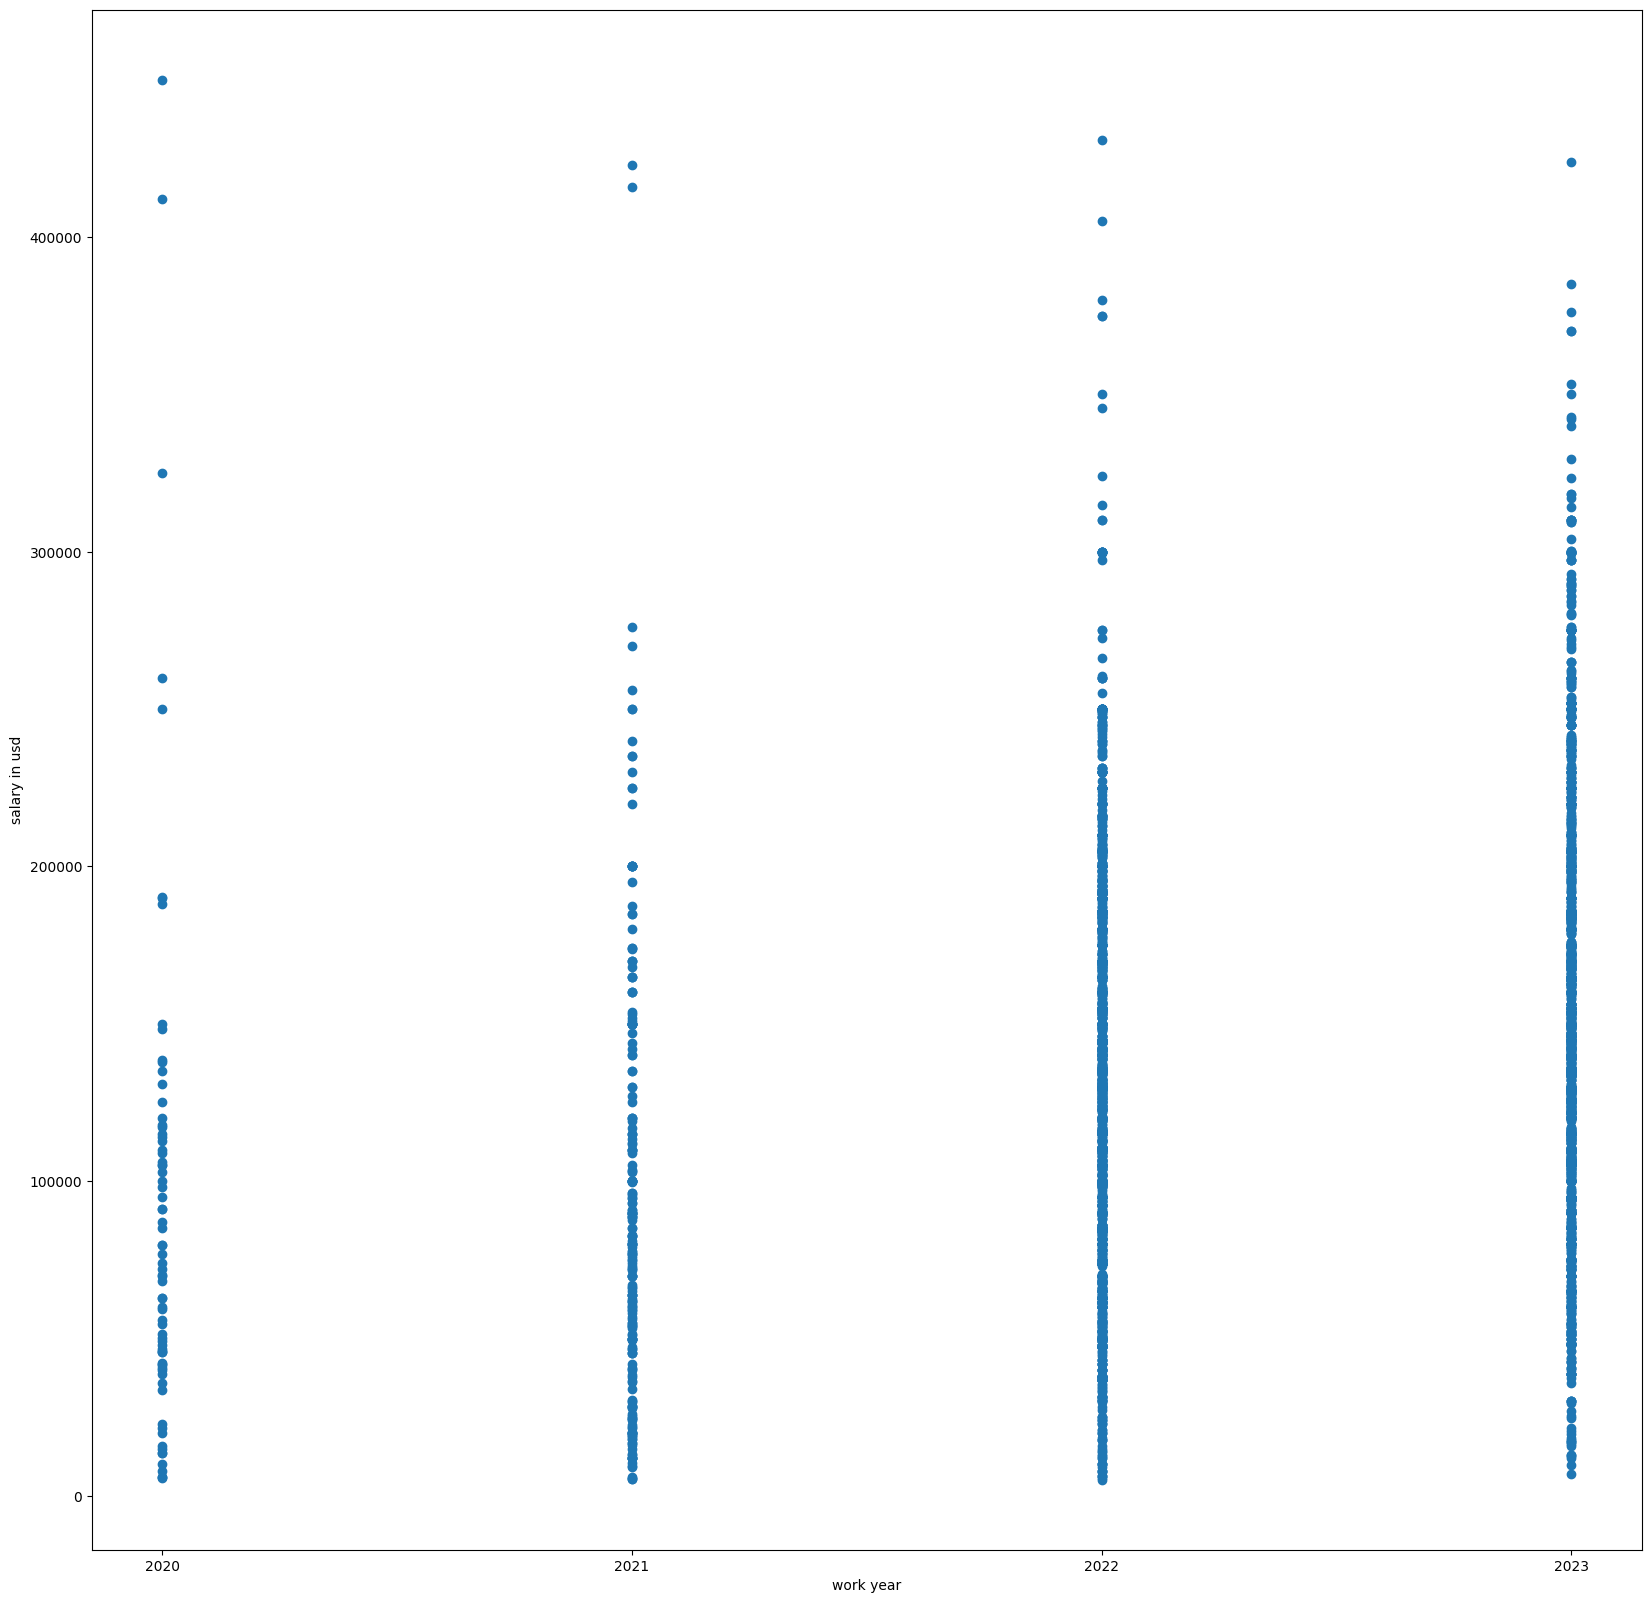

In [63]:

plt.scatter(df['work_year'], df['salary_in_usd'])
plt.xticks(ticks=[2020, 2021, 2022, 2023])
plt.xlabel("work year")
plt.ylabel("salary in usd")


Yes, when we examine the plot, we can observe that the salary has increased. In 2020, the outliers were above $100,000 USD, but in 2023, the outliers start at $300,000.

2. The second thing I was excited to check is the salary range in USD depending on the experience level.

Text(0, 0.5, 'experience_level')

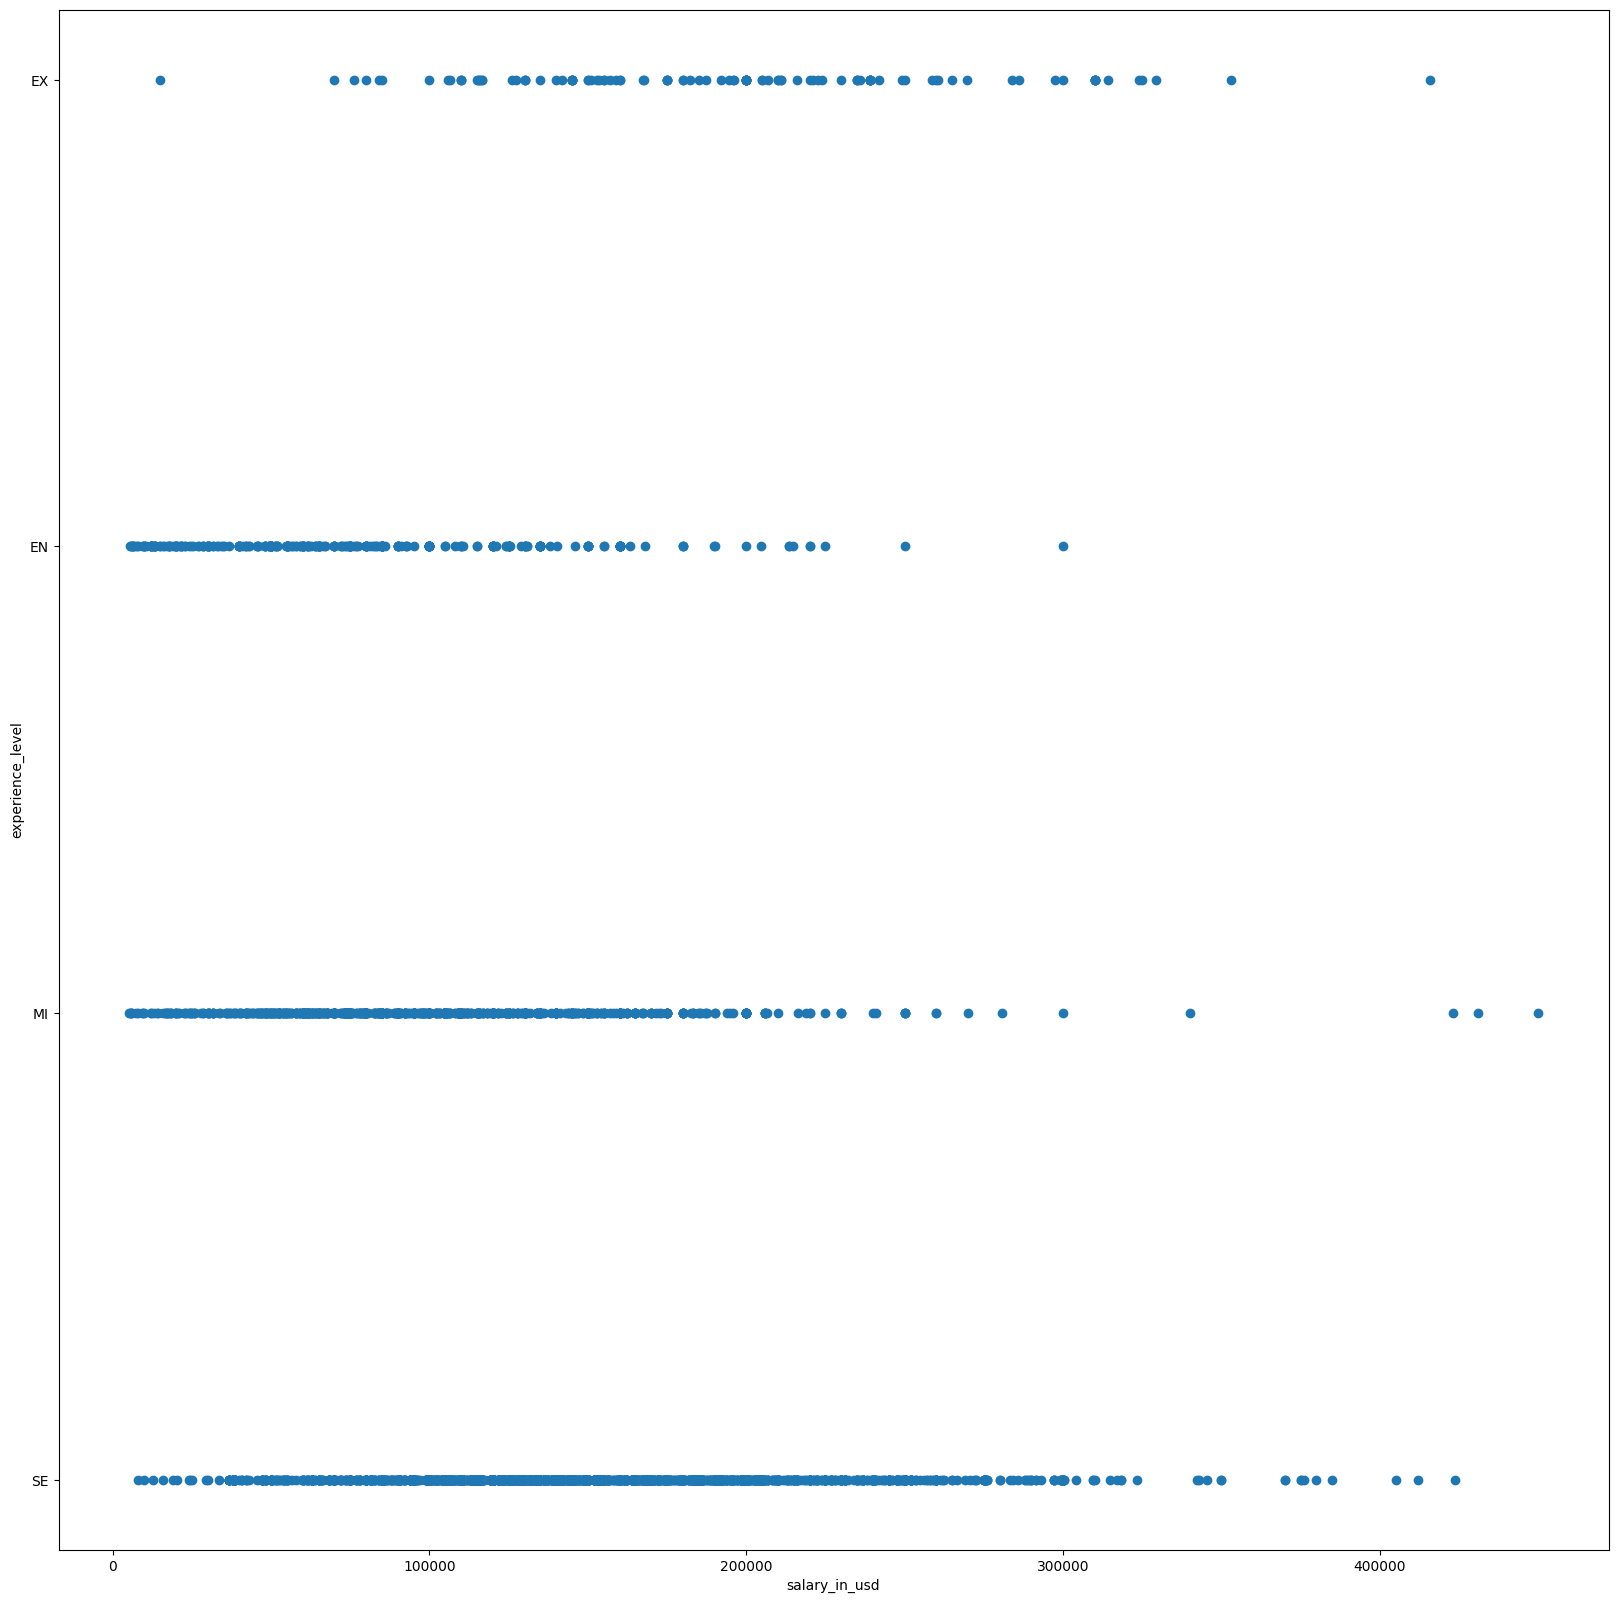

In [64]:

plt.scatter(df['salary_in_usd'], df['experience_level'])
plt.xlabel('salary_in_usd')
plt.ylabel("experience_level")


As expected, the largest salary range is for senior-level experience, spanning from approximately $50,000 to $250,000. Outliers are visible between 0 and 40,000 USD and from roughly 260,000 to 450,000 USD. For middle-level experience, the range is from 0 to 190,000 USD, with outliers appearing after 200,000 USD. Entry-level salaries range from 0 to 100,000 USD, and outliers are observed beyond 100,000 USD. Executive-level data is relatively scarce in the dataset, so the data points on the plot are considered outliers and vary from 0 to 500,000 USD.

Text(0, 0.5, 'salary in usd')

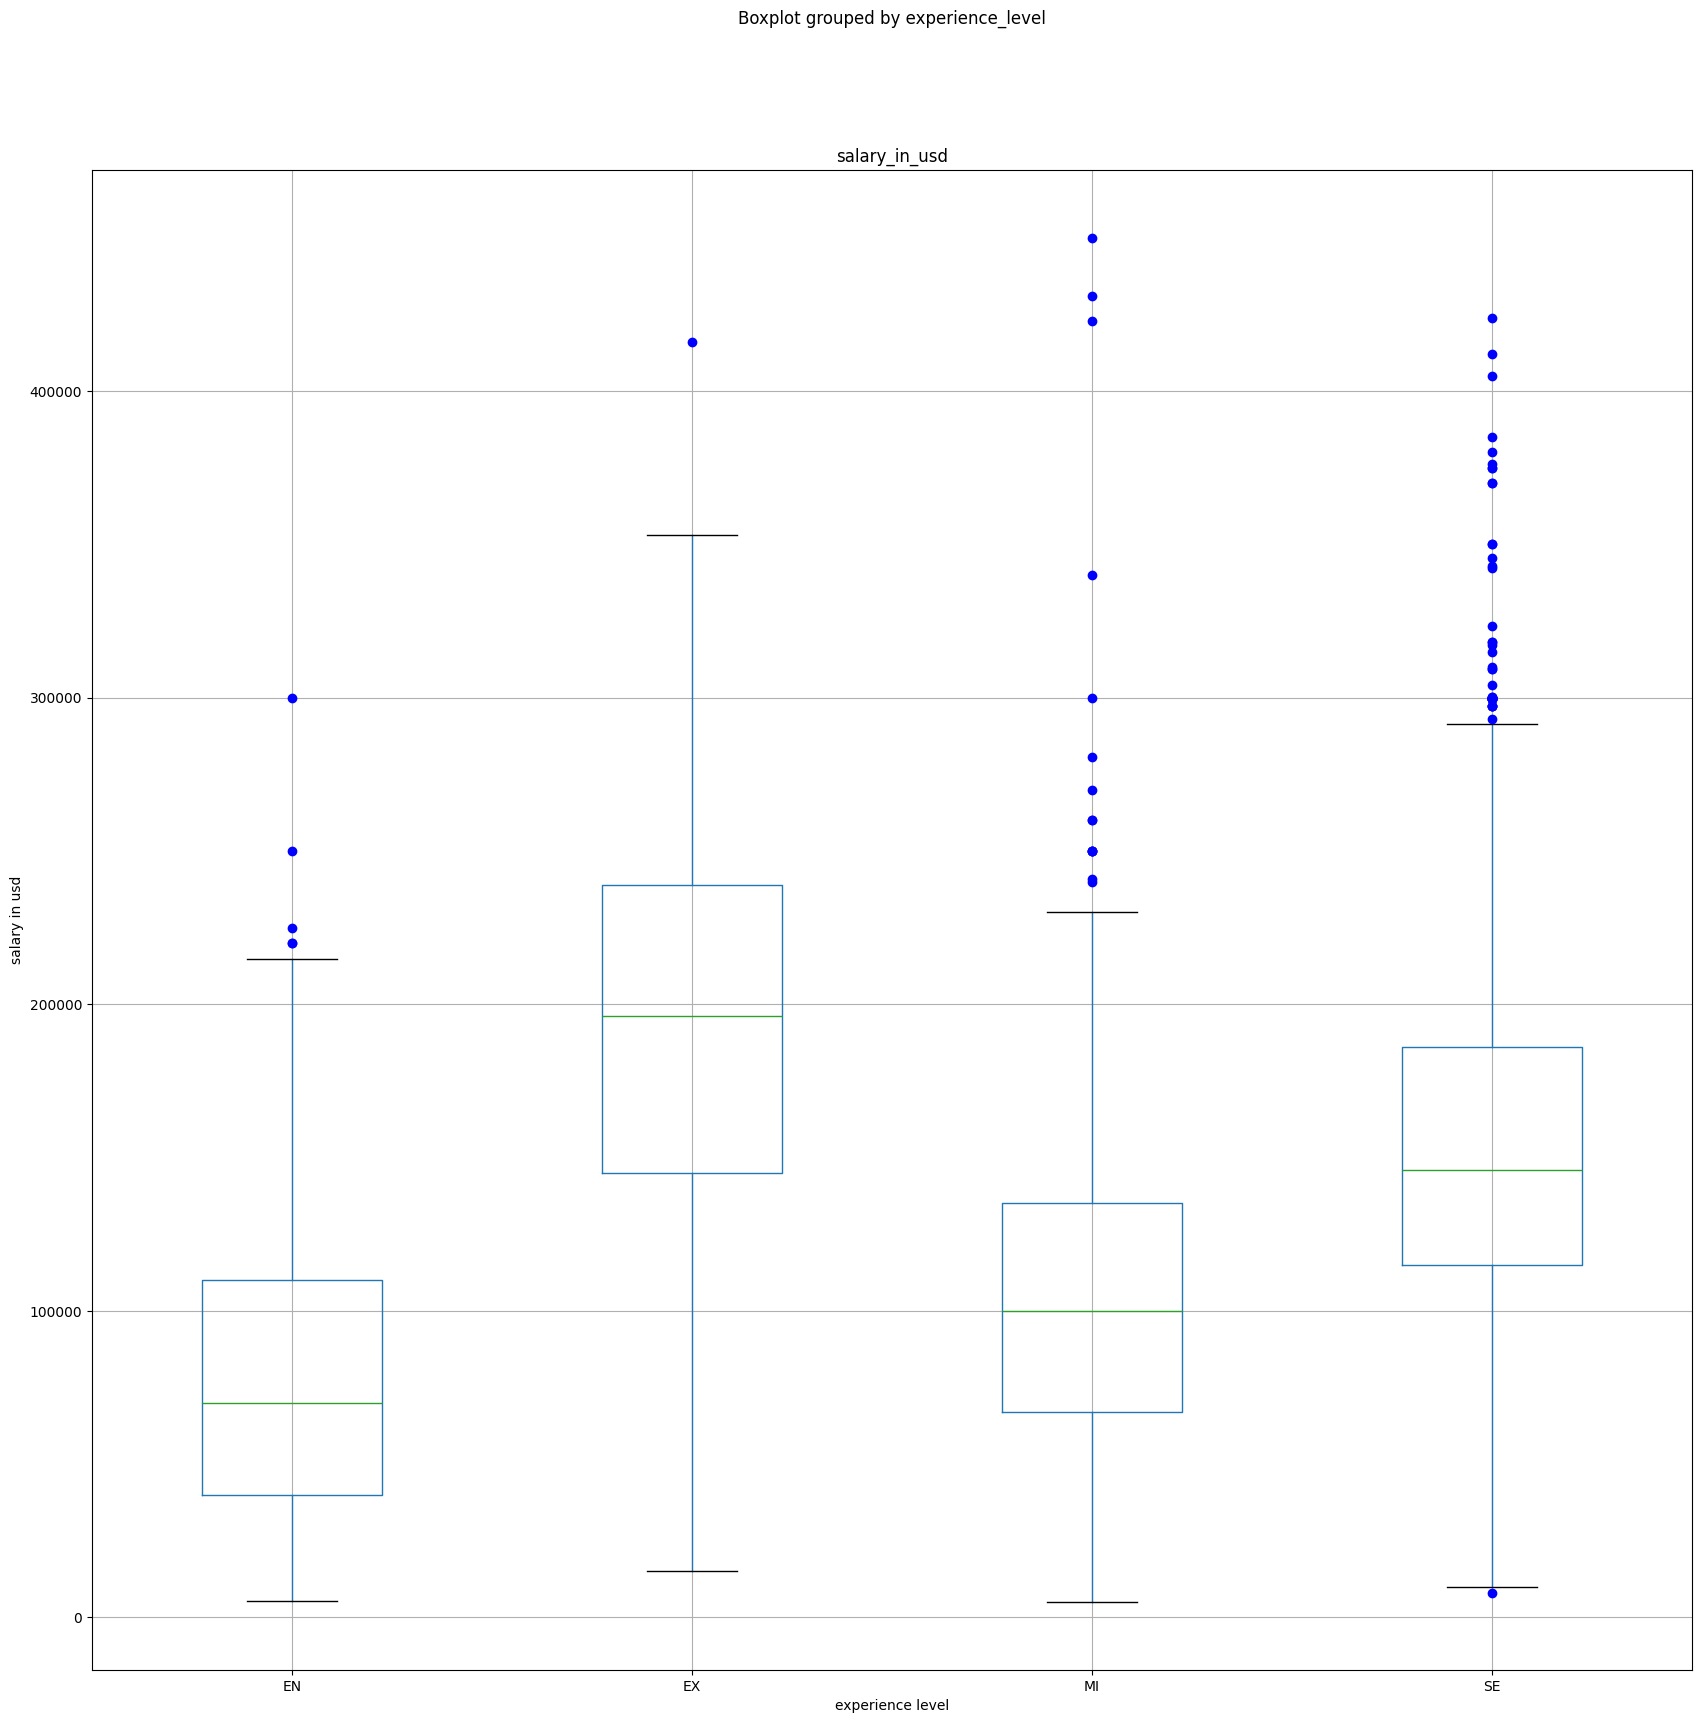

In [65]:

box_df = df[['salary_in_usd', 'experience_level']]
flierprops = dict(marker='o', markerfacecolor='b', linestyle='none', markeredgecolor='b')
box_df.boxplot(by='experience_level', flierprops=flierprops)
plt.xlabel('experience level')
plt.ylabel('salary in usd')

To my mind it's great to look at some data in different plots, so I made a box plot that shows the correlation between salary in USD and the level of experience.

3. The next question is whether the salary depends on the overall amount of remote work.

Text(0, 0.5, 'remote_ratio')

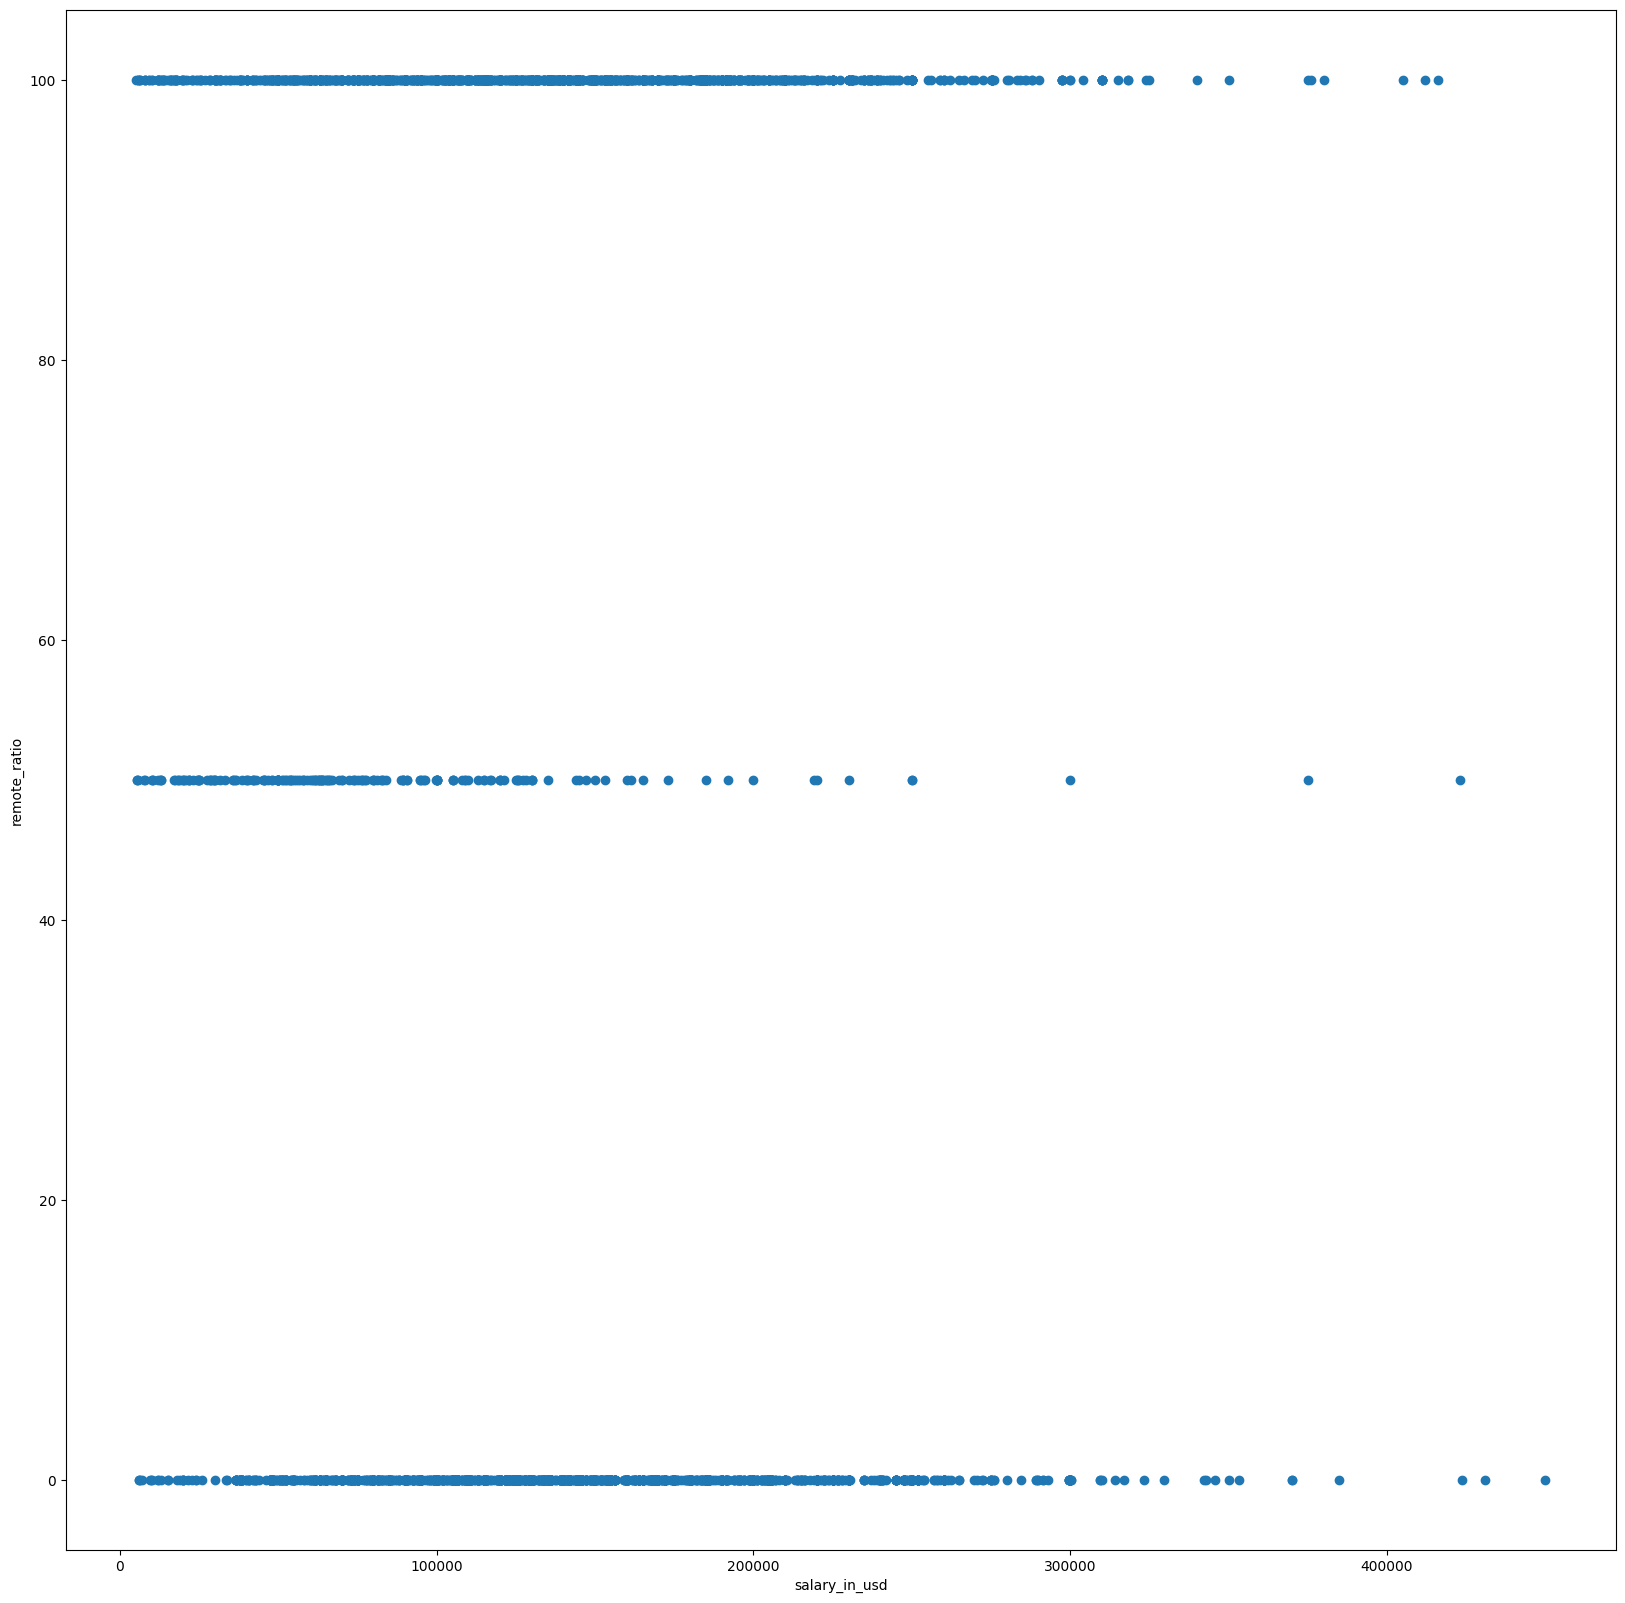

In [66]:

plt.scatter(df['salary_in_usd'], df['remote_ratio'])
plt.xlabel('salary_in_usd')
plt.ylabel('remote_ratio')


Examining the results, we can see that there is no correlation between the salary and the amount of remote work.

4. Looking at this result, I was curious to determine the largest group of people in this dataset when considering both experience level and remote work ratio.

(<Figure size 2000x2000 with 3 Axes>,
 {('SE', '100'): (0.0, 0.0, 0.6601378785592936, 0.43904442034554997),
  ('SE', '0'): (0.0,
   0.4423556786236957,
   0.6601378785592936,
   0.5369608018614641),
  ('SE', '50'): (0.0,
   0.9826277387633054,
   0.6601378785592936,
   0.017372261236694463),
  ('MI', '100'): (0.6650639869336779,
   0.0,
   0.21121263602552912,
   0.41339311422812713),
  ('MI', '0'): (0.6650639869336779,
   0.41670437250627285,
   0.21121263602552912,
   0.4886676812965323),
  ('MI', '50'): (0.6650639869336779,
   0.9086833120809509,
   0.21121263602552912,
   0.09131668791904901),
  ('EN', '100'): (0.8812027313335912,
   0.0,
   0.08396030251946503,
   0.4470198675496688),
  ('EN', '0'): (0.8812027313335912,
   0.45033112582781454,
   0.08396030251946503,
   0.34457781456953634),
  ('EN', '50'): (0.8812027313335912,
   0.7982201986754967,
   0.08396030251946503,
   0.2017798013245033),
  ('EX', '100'): (0.9700891422274405,
   0.0,
   0.029910857772559425,
   0.45311955

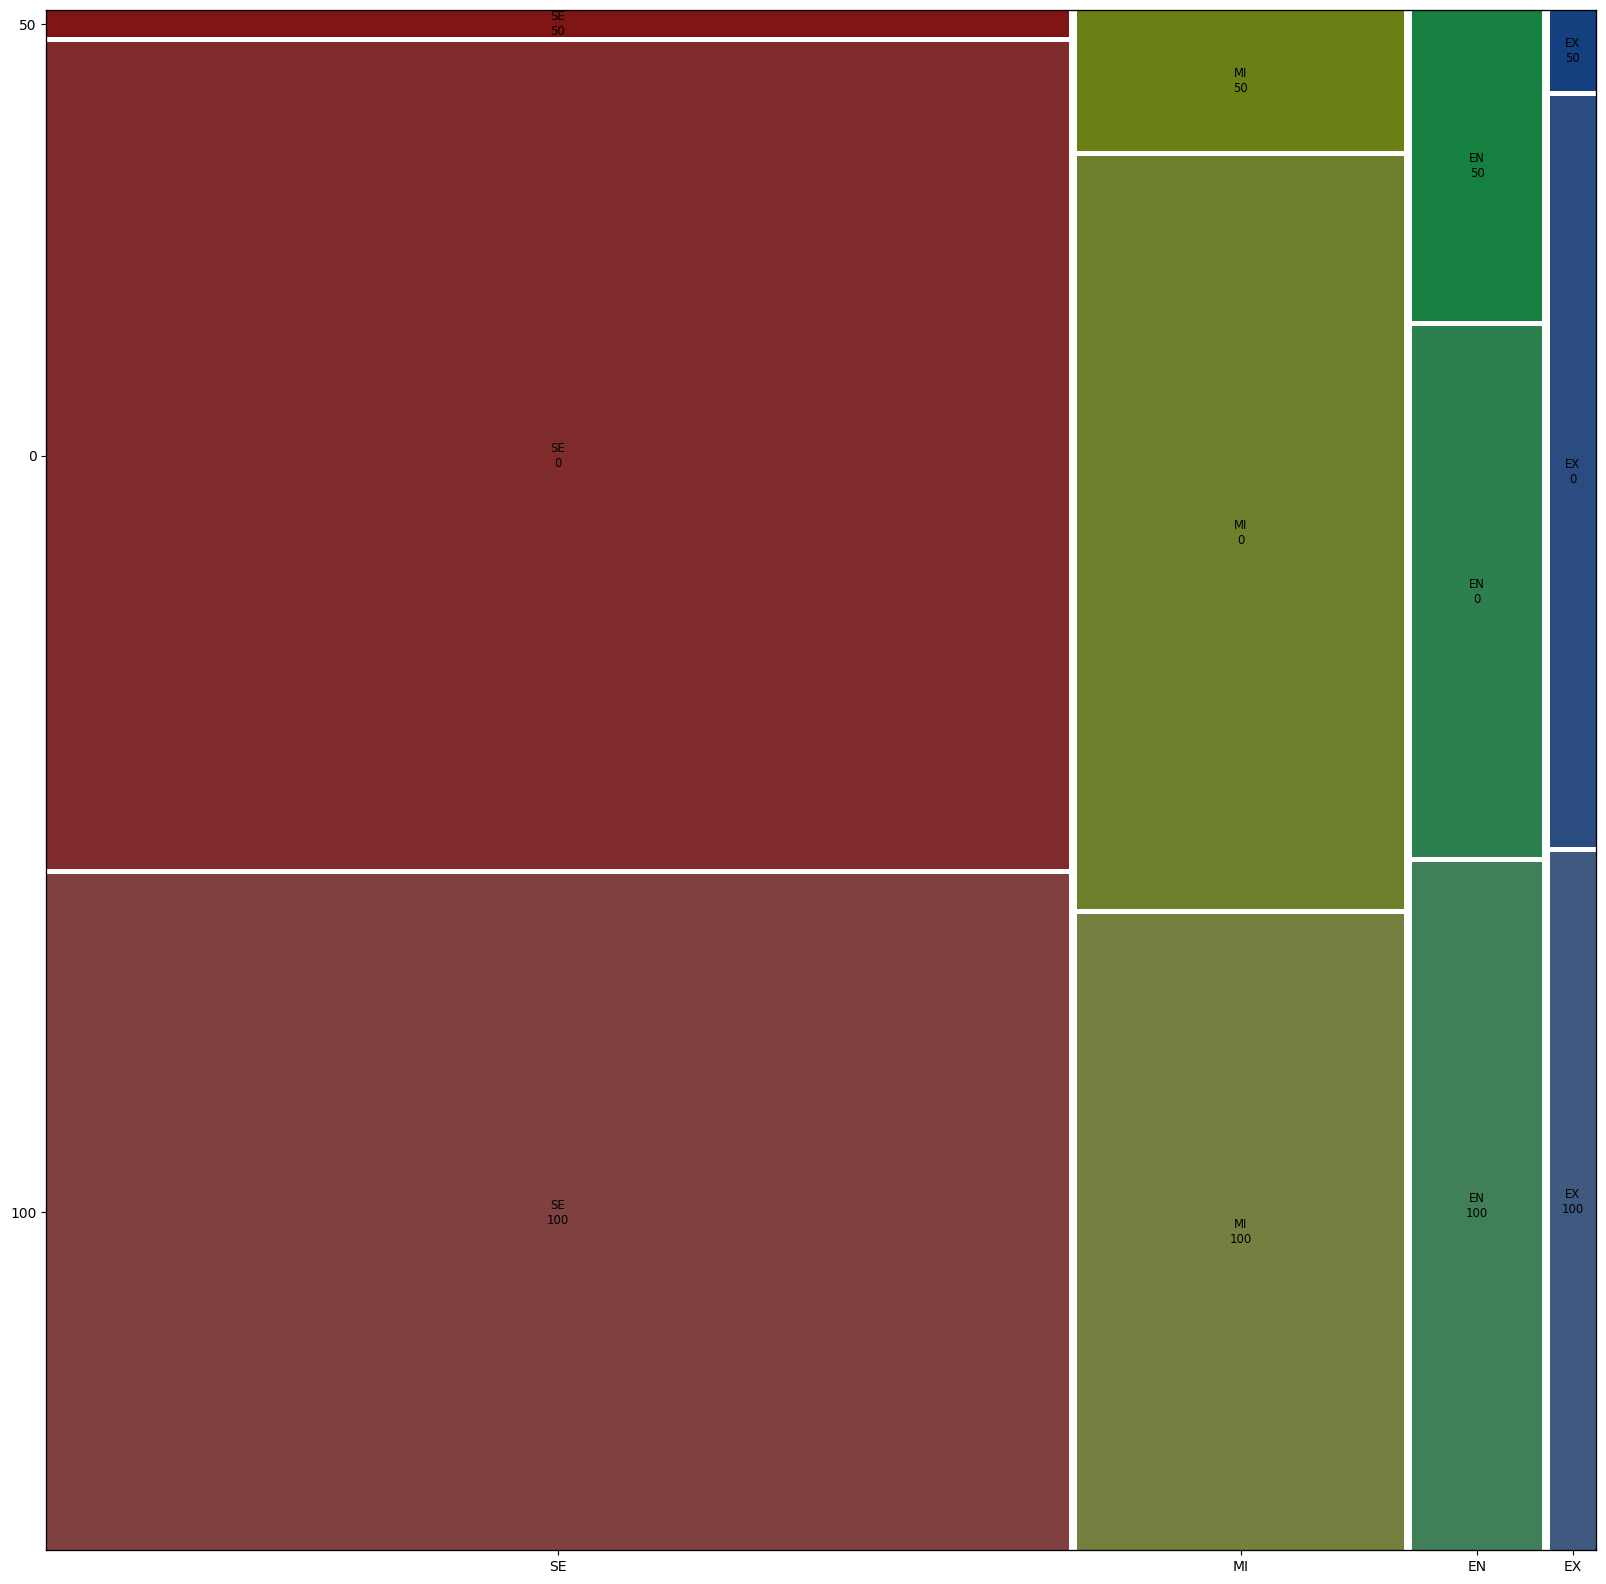

In [67]:
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
plt.rcParams["figure.figsize"]=(20, 20)
mosaic(df, ['experience_level','remote_ratio'])

Using mosaic plot I found out that the largest group is senior-level experience with a remote work ratio of 0.

I found these results quite interesting and decided to take a look at the experience level in this dataset.

In [72]:
fig=px.pie(df, values=df['experience_level'].value_counts().values,
           names=df['experience_level'].value_counts().index, title='Experience level')
fig.show()

By examining this pie chart, we can see that the largest group in this dataset consists of people with senior-level experience (67%), followed by those with middle-level experience (21.4%), entry-level (8.52%), and the smallest group is executive-level (3.04%).

5. I also wanted to determine if there is a correlation between salary in USD and the size of the company.

Text(0, 0.5, 'salary in usd')

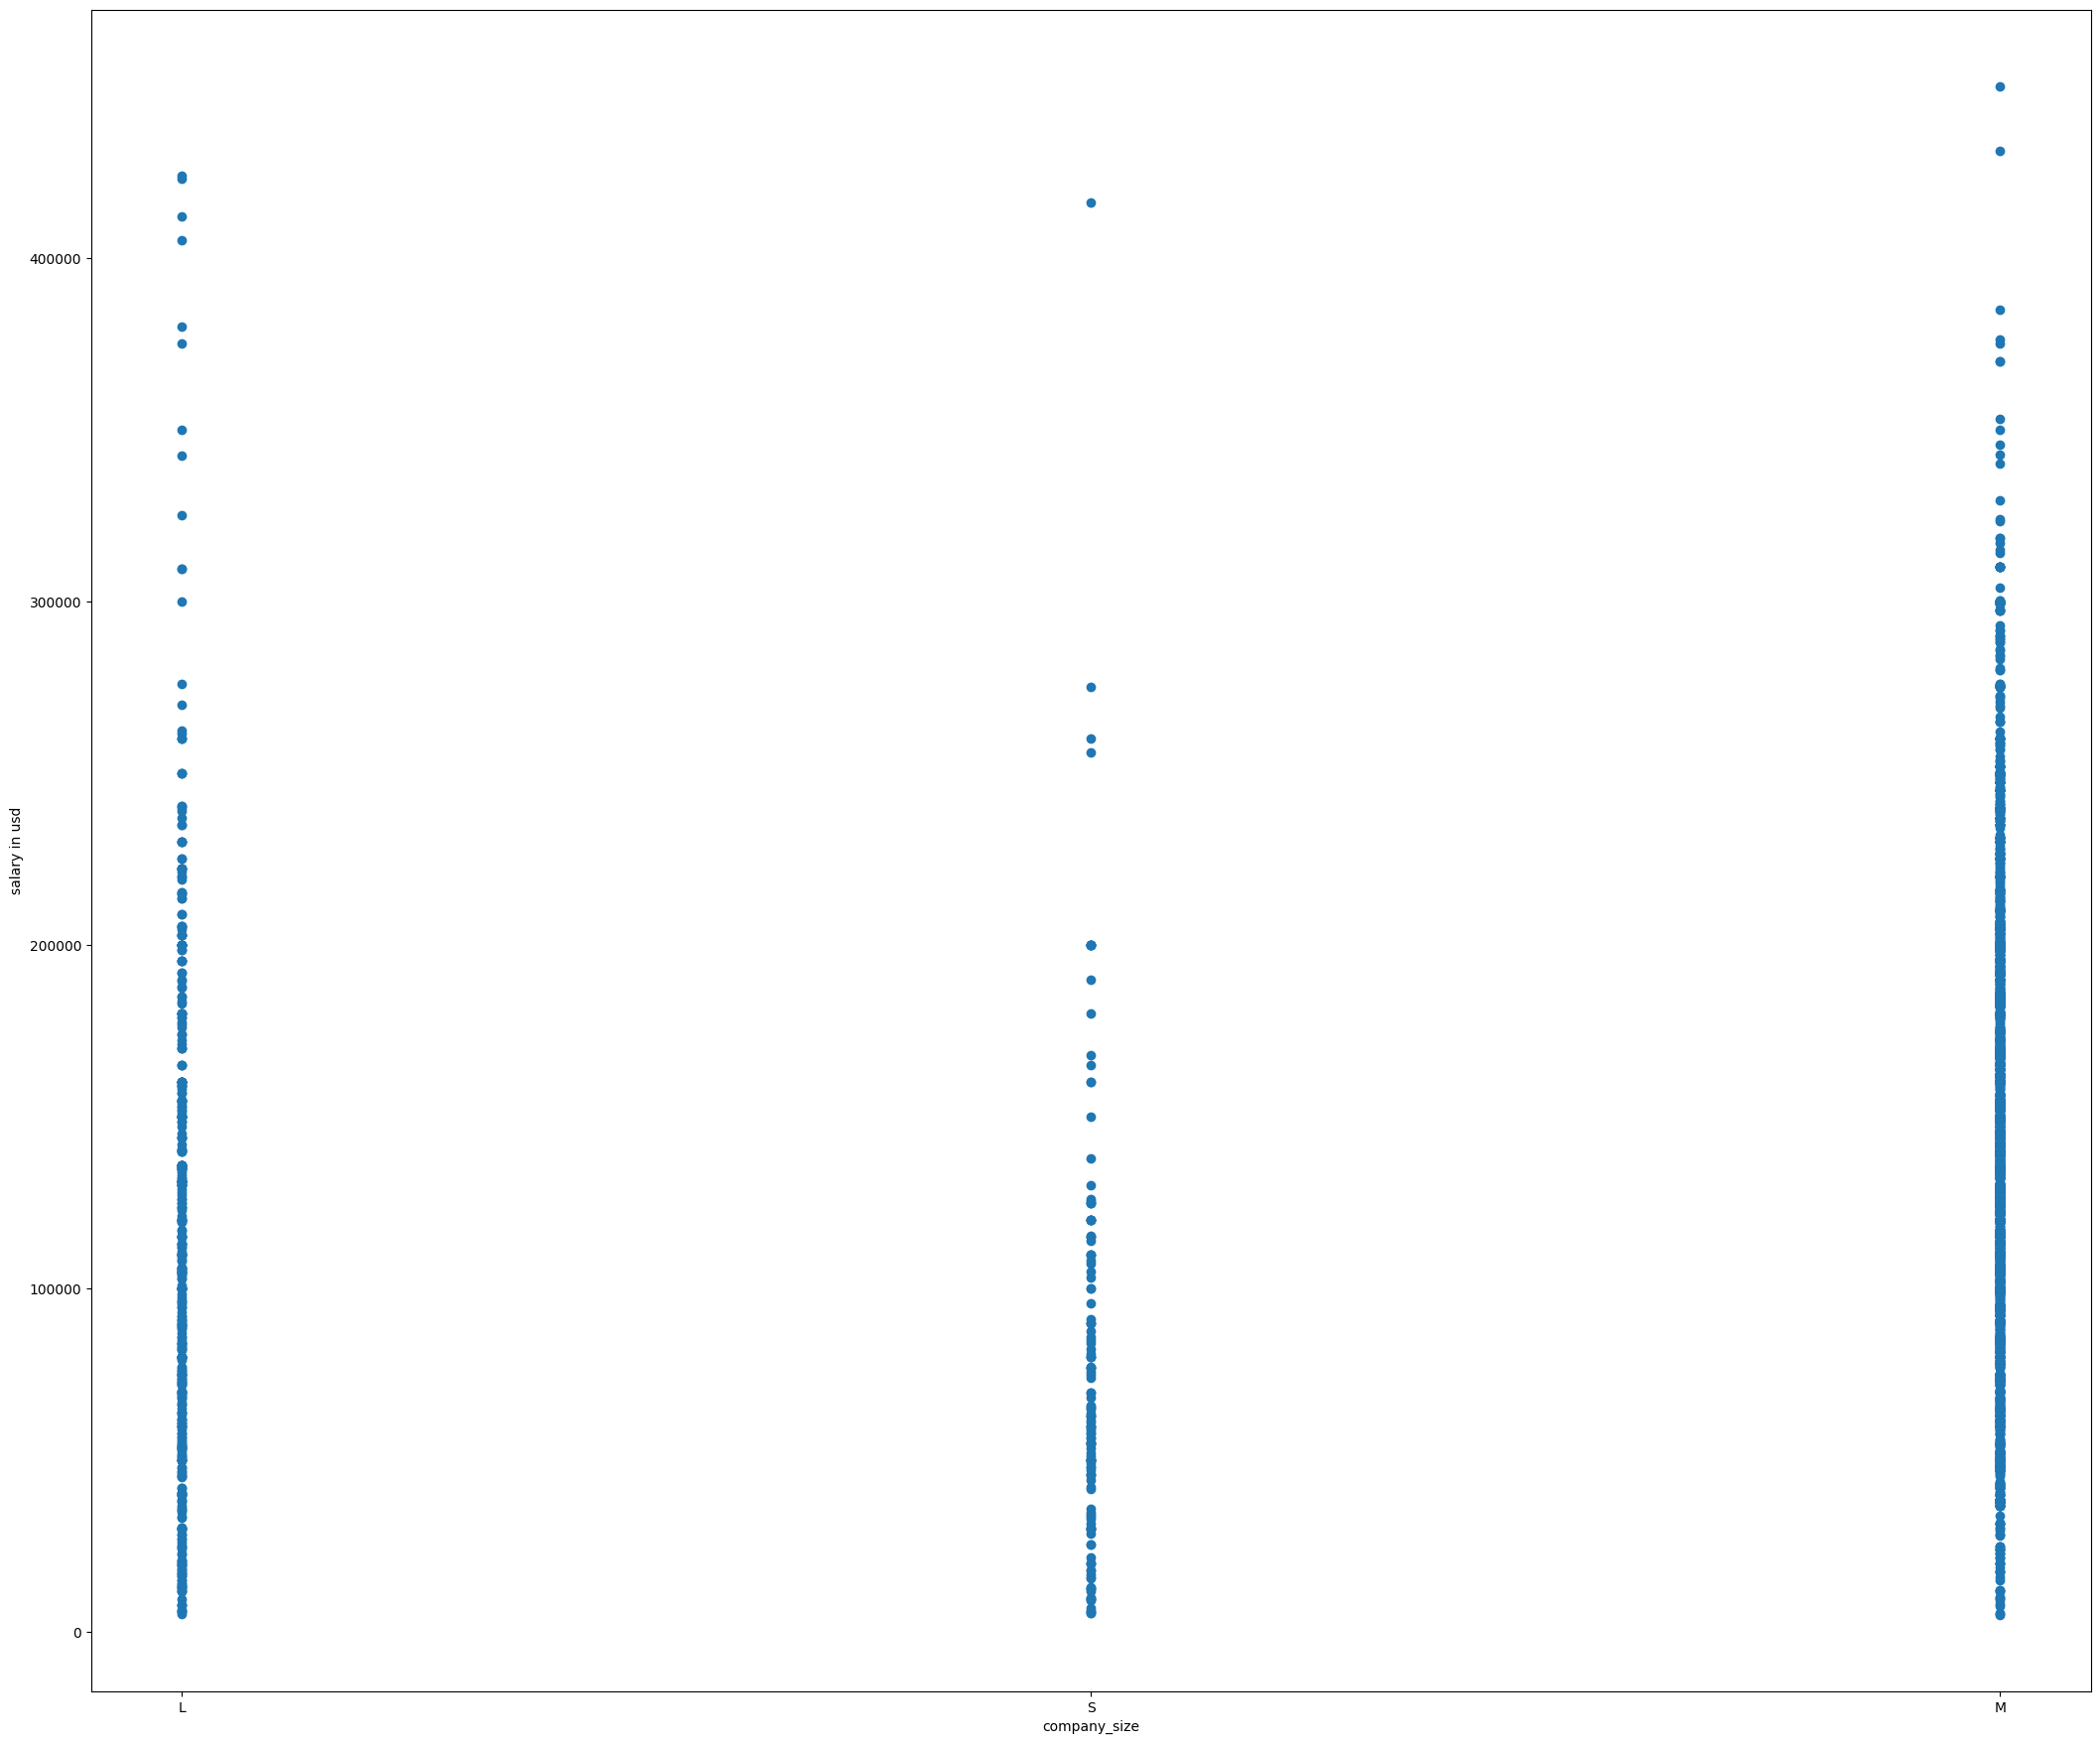

In [54]:

plt.scatter(df['company_size'], df['salary_in_usd'])
plt.xlabel("company_size")
plt.ylabel("salary in usd")

The results displayed on this plot are intriguing. While it was expected that salaries in small companies would be the smallest, it's fascinating to observe that the salary range in medium-sized companies is larger than that in large companies, and the highest salaries are found in middle-sized companies.

## Data Average

It is now intriguing to determine the top five jobs with the highest average salaries.

In [71]:
avg_salary_per_job = df.groupby(by='job_title')['salary_in_usd'].mean().reset_index(name='avg')
avg_salary_per_job.nlargest(5, 'avg')

,job_title,avg
46,Data Science Tech Lead,375000.000
19,Cloud Data Architect,250000.000
35,Data Lead,212500.000
28,Data Analytics Lead,211254.500
84,Principal Data Scientist,198171.125


The results showed that the top 5 jobs with the highest average salaries are: 
- Data Science Tech Lead	
- Cloud Data Architect	
- Data Lead	
- Data Analytics Lead	
- Principal Data Scientist	

In [ ]:
avg_salary_per_job = df.groupby(by='job_title')['salary'].mean().reset_index(name='avg')
avg_salary_per_job.nlargest(5, 'avg')

## World Map Statistics

/tmp/ipykernel_2450/3031916010.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<Axes: >

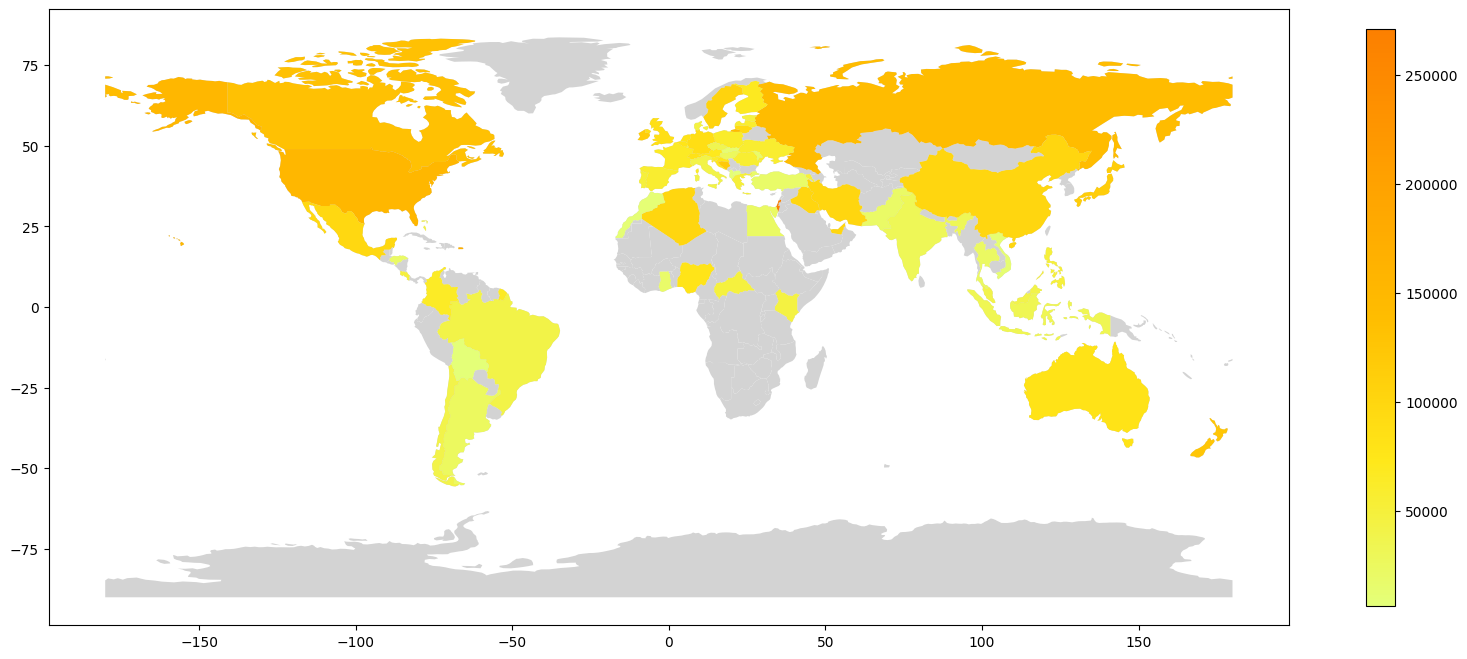

In [33]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['iso_a3', 'geometry']]
world.rename(columns={'iso_a3': 'country'}, inplace=True)

def convert_a2_to_a3(row):
    iso_a2 = row['company_location']
    country = pycountry.countries.get(alpha_2=iso_a2)
    return country.alpha_3

df['country'] = df.apply(convert_a2_to_a3, axis=1)
avg_per_country = df.groupby(by='country')['salary_in_usd'].mean().reset_index(name='avg')
merged = pd.merge(world, avg_per_country, on='country')
fig, ax = plt.subplots(figsize=(20,15))
world.plot(figsize=(20,15), color='lightgray', ax=ax)
merged.plot(column="avg", legend=True, legend_kwds={'shrink': 0.5}, cmap='Wistia', figsize=(20,15), ax=ax)

There is a world map that shows the statistics of average salary in USD per country.

The highest salaries are in Russia, USA, Canada, Israel, and Sweden.

Loooking at the result we see that the most group is senior-level experience with 0 remote ratio

## Filtering the information

Understanding that we have not only the company location but also the employee residence, I was curious to examine the data about non-U.S. citizens in U.S. companies.

In [69]:

filtered = df.loc[(df['employee_residence'] != 'US') & (df['company_location'] == 'US')]
filtered.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,41.000000,4.100000e+01,41.000000,41.000000
mean,2021.536585,5.091064e+05,75843.560976,87.804878
std,0.868837,1.824462e+06,54819.501270,26.880494
min,2020.000000,1.200000e+04,5679.000000,0.000000
25%,2021.000000,4.800000e+04,36259.000000,100.000000
50%,2022.000000,7.500000e+04,56000.000000,100.000000
75%,2022.000000,1.500000e+05,100000.000000,100.000000
max,2023.000000,1.100000e+07,200000.000000,100.000000


As a result, I discovered that there are 41 people in this category. More than 25% of the people in this category work remotely, and the minimum salary in this group is $5,679.